In [1]:
import pandas as pd
df = pd.read_csv("Naver_Restaurant_Reduced.csv", encoding='CP949')
df.head()

,Unnamed: 0,ID,상호명,포장,예약,주소,평균가격,최소가격,최대가격
0,2376,117568348,요리남,0,0,서울 마포구 홍익로3길 35,6100.0000,3900,7500
1,3667,1315743336,연탄콩,0,0,서울 마포구 백범로 111,6000.0000,6000,6000
2,787,20890363,도깨비우동,0,0,서울 서대문구 증가로 250,5166.6667,5000,5500
3,608,19754147,신촌돈부리모노,1,0,서울 서대문구 연세로4길 46,8000.0000,7000,9000
4,4142,1509630356,장미맨숀 신촌점,0,0,서울 서대문구 연세로5가길 8-6,17000.0000,15000,23000


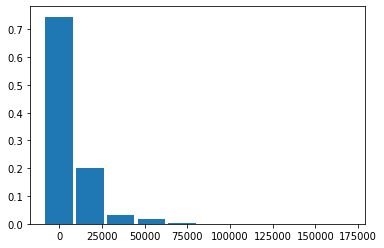

In [2]:
import numpy as np
hist, bins = np.histogram(df["평균가격"].values, range=(0,180000))
hist = hist / hist.sum()

import matplotlib.pyplot as plt
plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]) * 0.9)
plt.show()

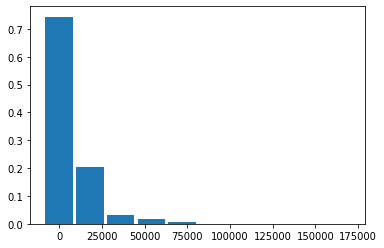

정보손실 정도: 0.008016


In [3]:
from diffprivlib import tools as dp
#차등정보보호로 얻게되는 결과는 랜덤성이 있어 '정보손실 정도'와 '히스토그램'이 다를 수 있음
dp_hist1, dp_bins1 = dp.histogram(df["평균가격"].values, epsilon=1, range=(0,180000)) 
dp_hist1 = dp_hist1 / dp_hist1.sum()

plt.bar(dp_bins1[:-1], dp_hist1, width=(dp_bins1[1] - dp_bins1[0]) * 0.9)
plt.show()

print("정보손실 정도: %f" % np.abs(hist - dp_hist1).sum())

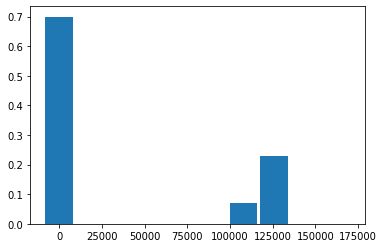

정보손실 정도: 0.600998


In [4]:
#차등정보보호로 얻게되는 결과는 랜덤성이 있어 '정보손실 정도'와 '히스토그램'이 다를 수 있음
dp_hist2, dp_bins2 = dp.histogram(df["평균가격"].values, epsilon=0.01, range=(0,180000))
dp_hist2 = dp_hist2 / dp_hist2.sum()

plt.bar(dp_bins2[:-1], dp_hist2, width=(dp_bins2[1] - dp_bins2[0]) * 0.9)
plt.show()

print("정보손실 정도: %f" % np.abs(hist - dp_hist2).sum())